In [1]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [2]:
df_train = pd.read_csv("./dataset/train_features.csv")
df_test = pd.read_csv("./dataset/test_features.csv")

In [3]:
df_train

,letter_slant,line_slant,letter_size,word_spacing,personality
0,2.0,-75.1,931.7,15.0,Agreeableness
1,-11.0,9.6,486.2,22.0,Agreeableness
2,18.0,-2.3,112.8,1.0,Agreeableness
3,6.0,-4.0,30.6,1.0,Agreeableness
4,-6.0,0.0,152.9,9.0,Agreeableness
...,...,...,...,...,...
172,11.0,-86.2,488.9,10.0,Openness
173,6.0,0.0,74.0,20.5,Openness
174,9.0,-11.0,808.8,25.0,Openness
175,8.0,-4.8,364.3,12.0,Openness


In [4]:
df_test

,letter_slant,line_slant,letter_size,word_spacing,personality
0,0.0,1.0,421.2,14.0,Agreeableness
1,-3.0,1.8,94.8,22.0,Agreeableness
2,10.0,-1.9,1397.6,39.0,Agreeableness
3,0.0,2.8,84.2,71.0,Agreeableness
4,-2.0,-87.0,763.3,18.0,Agreeableness
5,2.0,0.0,93.7,46.5,Agreeableness
6,-4.0,3.1,466.8,45.0,Agreeableness
7,4.0,-3.0,121.8,43.0,Agreeableness
8,9.0,-1.9,2373.9,50.5,Conscientiousness
9,-10.0,2.1,1322.6,31.0,Conscientiousness


In [5]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  177 non-null    float64
 1   line_slant    177 non-null    float64
 2   letter_size   177 non-null    float64
 3   word_spacing  177 non-null    float64
 4   personality   177 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  44 non-null     float64
 1   line_slant    44 non-null     float64
 2   letter_size   44 non-null     float64
 3   word_spacing  44 non-null     float64
 4   personality   44 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.8+ KB
None


In [6]:
df_train.isnull().sum()

letter_slant    0
line_slant      0
letter_size     0
word_spacing    0
personality     0
dtype: int64

In [7]:
df_test.isnull().sum()

letter_slant    0
line_slant      0
letter_size     0
word_spacing    0
personality     0
dtype: int64

In [8]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [9]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  177 non-null    float64
 1   line_slant    177 non-null    float64
 2   letter_size   177 non-null    float64
 3   word_spacing  177 non-null    float64
 4   personality   177 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  44 non-null     float64
 1   line_slant    44 non-null     float64
 2   letter_size   44 non-null     float64
 3   word_spacing  44 non-null     float64
 4   personality   44 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.8+ KB
None


In [10]:
x_train = df_train.drop('personality', axis=1)
y_train = df_train['personality']
x_test = df_test.drop('personality', axis=1)
y_test = df_test['personality']

In [11]:
dtree = DecisionTreeClassifier()
dtree_res = dtree.fit(x_train, y_train)

In [12]:
y_pred = dtree.predict(x_test)
print(y_pred)

['Openness' 'Neuroticism' 'Openness' 'Agreeableness' 'Neuroticism'
 'Openness' 'Openness' 'Conscientiousness' 'Openness' 'Agreeableness'
 'Openness' 'Neuroticism' 'Neuroticism' 'Neuroticism' 'Agreeableness'
 'Agreeableness' 'Agreeableness' 'Openness' 'Conscientiousness'
 'Conscientiousness' 'Neuroticism' 'Conscientiousness' 'Neuroticism'
 'Openness' 'Agreeableness' 'Conscientiousness' 'Openness' 'Openness'
 'Openness' 'Openness' 'Openness' 'Openness' 'Conscientiousness'
 'Extraversion' 'Extraversion' 'Openness' 'Agreeableness'
 'Conscientiousness' 'Neuroticism' 'Neuroticism' 'Neuroticism' 'Openness'
 'Openness' 'Agreeableness']


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.2727272727272727

In [14]:
dtree.feature_importances_

array([0.23488388, 0.30663976, 0.25341676, 0.2050596 ])

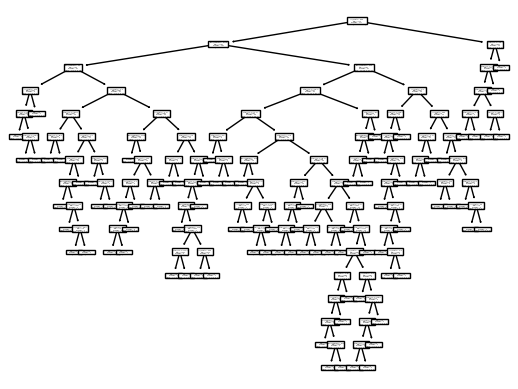

In [15]:
tree.plot_tree(dtree_res, feature_names=list(df_test.columns))
# plt.savefig(sys.stdout.buffer)
sys.stdout.flush()